<a href="https://colab.research.google.com/github/RanxduG/Sri-Lanka-Formaldehyde-Level-Analysis/blob/main/Data_Engineering_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [1]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=421875ab875d01b19a10ece343c917f4d403f50638483382ebb43926918e1fe4
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark
The following additional packages will be installed:
  libxtst6 openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra fonts-nanum fonts-ipafont-gothic
  fonts-ipafont-mincho fonts-wqy-microhei fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  libxtst6 openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 39.7 MB of archives.
After this operation, 144 MB of additional disk space will be used.
Selecting previously unselected package

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [3]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, DoubleType, StringType
import pyspark.sql  as pyspark_sql
from pyspark.sql.functions import col
from pyspark import SparkContext, SparkConf
from google.colab import drive

#Loading Dataset

In [4]:
# create the session
conf = SparkConf().set("spark.ui.port", "4050")

# create the context
sc = pyspark.SparkContext(conf=conf)
spark = pyspark_sql.SparkSession.builder.getOrCreate()

In [5]:
schema = StructType([
    StructField("HCHO reading", DoubleType(), True),
    StructField("Location", StringType(), True),
    StructField("Current Date", StringType(), True),
    StructField("Next Date", StringType(), True)
])


In [6]:
drive.mount("/content/drive")

col_mat_nuw_data = spark.read.csv("/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/col_mat_nuw_output.csv", header=False, schema=schema)
kan_data = spark.read.csv("/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/kan_output.csv", header=False, schema=schema)
mon_kur_jaf_data = spark.read.csv("/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/mon_kur_jaf_output.csv", header=False, schema=schema)

Mounted at /content/drive


In [7]:
print("Colombo, Matara & Nuwara Eliya")
col_mat_nuw_data.printSchema()

print("Kandy")
kan_data.printSchema()

print("Monaragala, Kurunegala & Jaffna")
mon_kur_jaf_data.printSchema()

Colombo, Matara & Nuwara Eliya
root
 |-- HCHO reading: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- Current Date: string (nullable = true)
 |-- Next Date: string (nullable = true)

Kandy
root
 |-- HCHO reading: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- Current Date: string (nullable = true)
 |-- Next Date: string (nullable = true)

Monaragala, Kurunegala & Jaffna
root
 |-- HCHO reading: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- Current Date: string (nullable = true)
 |-- Next Date: string (nullable = true)



In [8]:
col_mat_nuw_data.show()

+--------------------+--------------+------------+----------+
|        HCHO reading|      Location|Current Date| Next Date|
+--------------------+--------------+------------+----------+
|1.969834395781014...|Colombo Proper|  2019-01-01|2019-01-02|
|2.625522171968594...|Colombo Proper|  2019-01-02|2019-01-03|
|9.852118897938794E-5|Colombo Proper|  2019-01-03|2019-01-04|
|2.099320518114242E-4|Colombo Proper|  2019-01-04|2019-01-05|
|1.785337298892930...|Colombo Proper|  2019-01-05|2019-01-06|
|1.082296700235670...|Colombo Proper|  2019-01-06|2019-01-07|
|3.926829280477309...|Colombo Proper|  2019-01-07|2019-01-08|
|9.153156350685351E-5|Colombo Proper|  2019-01-08|2019-01-09|
|1.205978992853015...|Colombo Proper|  2019-01-09|2019-01-10|
|1.297723562983258...|Colombo Proper|  2019-01-10|2019-01-11|
|2.239188166801278...|Colombo Proper|  2019-01-11|2019-01-12|
|1.569418094178759...|Colombo Proper|  2019-01-12|2019-01-13|
|                NULL|Colombo Proper|  2019-01-13|2019-01-14|
|1.33629

In [9]:
kan_data.show()

+--------------------+------------+------------+----------+
|        HCHO reading|    Location|Current Date| Next Date|
+--------------------+------------+------------+----------+
|1.760713459877335...|Kandy Proper|  2019-01-01|2019-01-02|
|9.220391253917748E-5|Kandy Proper|  2019-01-02|2019-01-03|
|                NULL|Kandy Proper|  2019-01-03|2019-01-04|
|1.908681983853839...|Kandy Proper|  2019-01-04|2019-01-05|
|1.219517840206744...|Kandy Proper|  2019-01-05|2019-01-06|
|-6.51408612938880...|Kandy Proper|  2019-01-06|2019-01-07|
|  1.6323820639265E-4|Kandy Proper|  2019-01-07|2019-01-08|
|-6.73520553391426...|Kandy Proper|  2019-01-08|2019-01-09|
|1.279693658243135...|Kandy Proper|  2019-01-09|2019-01-10|
|4.546048424126012E-5|Kandy Proper|  2019-01-10|2019-01-11|
|3.600074175192105E-5|Kandy Proper|  2019-01-11|2019-01-12|
|1.286629698010177E-4|Kandy Proper|  2019-01-12|2019-01-13|
|                NULL|Kandy Proper|  2019-01-13|2019-01-14|
|                NULL|Kandy Proper|  201

In [10]:
mon_kur_jaf_data.show()

+--------------------+------------------+------------+----------+
|        HCHO reading|          Location|Current Date| Next Date|
+--------------------+------------------+------------+----------+
|                NULL|Bibile, Monaragala|  2019-01-01|2019-01-02|
|1.919914652467399E-5|Bibile, Monaragala|  2019-01-02|2019-01-03|
|2.811447935930283...|Bibile, Monaragala|  2019-01-03|2019-01-04|
|3.747998184385943E-5|Bibile, Monaragala|  2019-01-04|2019-01-05|
|-1.79826087934531...|Bibile, Monaragala|  2019-01-05|2019-01-06|
|1.457836896179902...|Bibile, Monaragala|  2019-01-06|2019-01-07|
|2.828590802546534...|Bibile, Monaragala|  2019-01-07|2019-01-08|
|                NULL|Bibile, Monaragala|  2019-01-08|2019-01-09|
|1.420850167050957...|Bibile, Monaragala|  2019-01-09|2019-01-10|
|                NULL|Bibile, Monaragala|  2019-01-10|2019-01-11|
|2.014587947072581E-5|Bibile, Monaragala|  2019-01-11|2019-01-12|
|1.582787663210183...|Bibile, Monaragala|  2019-01-12|2019-01-13|
|         

#Data Preprocessing

##Seperating Dataset

In [11]:
Monaragala_Data = mon_kur_jaf_data.filter(mon_kur_jaf_data['Location'] == 'Bibile, Monaragala')

In [12]:
Monaragala_Data.show()

+--------------------+------------------+------------+----------+
|        HCHO reading|          Location|Current Date| Next Date|
+--------------------+------------------+------------+----------+
|                NULL|Bibile, Monaragala|  2019-01-01|2019-01-02|
|1.919914652467399E-5|Bibile, Monaragala|  2019-01-02|2019-01-03|
|2.811447935930283...|Bibile, Monaragala|  2019-01-03|2019-01-04|
|3.747998184385943E-5|Bibile, Monaragala|  2019-01-04|2019-01-05|
|-1.79826087934531...|Bibile, Monaragala|  2019-01-05|2019-01-06|
|1.457836896179902...|Bibile, Monaragala|  2019-01-06|2019-01-07|
|2.828590802546534...|Bibile, Monaragala|  2019-01-07|2019-01-08|
|                NULL|Bibile, Monaragala|  2019-01-08|2019-01-09|
|1.420850167050957...|Bibile, Monaragala|  2019-01-09|2019-01-10|
|                NULL|Bibile, Monaragala|  2019-01-10|2019-01-11|
|2.014587947072581E-5|Bibile, Monaragala|  2019-01-11|2019-01-12|
|1.582787663210183...|Bibile, Monaragala|  2019-01-12|2019-01-13|
|         

In [13]:
Kurunegala_Data = mon_kur_jaf_data.filter(mon_kur_jaf_data['Location'] == 'Kurunegala Proper')

In [14]:
Kurunegala_Data.show()

+--------------------+-----------------+------------+----------+
|        HCHO reading|         Location|Current Date| Next Date|
+--------------------+-----------------+------------+----------+
|8.829725542537962E-5|Kurunegala Proper|  2019-01-01|2019-01-02|
|1.370787402778218...|Kurunegala Proper|  2019-01-02|2019-01-03|
|1.480085027113037E-4|Kurunegala Proper|  2019-01-03|2019-01-04|
|-2.04637905973554...|Kurunegala Proper|  2019-01-04|2019-01-05|
|2.489134742856164E-4|Kurunegala Proper|  2019-01-05|2019-01-06|
|1.015583300177078...|Kurunegala Proper|  2019-01-06|2019-01-07|
|1.919056668190272...|Kurunegala Proper|  2019-01-07|2019-01-08|
|1.215500456138868...|Kurunegala Proper|  2019-01-08|2019-01-09|
|9.741700467262773E-5|Kurunegala Proper|  2019-01-09|2019-01-10|
|1.130342628012010...|Kurunegala Proper|  2019-01-10|2019-01-11|
|7.047632943988818E-5|Kurunegala Proper|  2019-01-11|2019-01-12|
|1.691712548577679E-4|Kurunegala Proper|  2019-01-12|2019-01-13|
|                NULL|Kur

In [15]:
Jaffna_Data = mon_kur_jaf_data.filter(mon_kur_jaf_data['Location'] == 'Jaffna Proper')

In [16]:
Jaffna_Data.show()

+--------------------+-------------+------------+----------+
|        HCHO reading|     Location|Current Date| Next Date|
+--------------------+-------------+------------+----------+
|5.830909719406619E-5|Jaffna Proper|  2019-01-01|2019-01-02|
|1.017952795536237...|Jaffna Proper|  2019-01-02|2019-01-03|
| 3.93133105404262E-5|Jaffna Proper|  2019-01-03|2019-01-04|
|-2.38398465761844...|Jaffna Proper|  2019-01-04|2019-01-05|
|1.589137302293815...|Jaffna Proper|  2019-01-05|2019-01-06|
|7.539679629744287E-5|Jaffna Proper|  2019-01-06|2019-01-07|
|1.799237734955577...|Jaffna Proper|  2019-01-07|2019-01-08|
|9.470708011674723E-5|Jaffna Proper|  2019-01-08|2019-01-09|
|2.109364950895559E-6|Jaffna Proper|  2019-01-09|2019-01-10|
|1.318967807501841...|Jaffna Proper|  2019-01-10|2019-01-11|
|1.337016372402064...|Jaffna Proper|  2019-01-11|2019-01-12|
|5.957003084127642...|Jaffna Proper|  2019-01-12|2019-01-13|
|-4.15786713782524...|Jaffna Proper|  2019-01-13|2019-01-14|
|2.010835129084908E-5|Ja

In [17]:
Colombo_Data = col_mat_nuw_data.filter(col_mat_nuw_data['Location'] == 'Colombo Proper')

In [18]:
Colombo_Data.show()

+--------------------+--------------+------------+----------+
|        HCHO reading|      Location|Current Date| Next Date|
+--------------------+--------------+------------+----------+
|1.969834395781014...|Colombo Proper|  2019-01-01|2019-01-02|
|2.625522171968594...|Colombo Proper|  2019-01-02|2019-01-03|
|9.852118897938794E-5|Colombo Proper|  2019-01-03|2019-01-04|
|2.099320518114242E-4|Colombo Proper|  2019-01-04|2019-01-05|
|1.785337298892930...|Colombo Proper|  2019-01-05|2019-01-06|
|1.082296700235670...|Colombo Proper|  2019-01-06|2019-01-07|
|3.926829280477309...|Colombo Proper|  2019-01-07|2019-01-08|
|9.153156350685351E-5|Colombo Proper|  2019-01-08|2019-01-09|
|1.205978992853015...|Colombo Proper|  2019-01-09|2019-01-10|
|1.297723562983258...|Colombo Proper|  2019-01-10|2019-01-11|
|2.239188166801278...|Colombo Proper|  2019-01-11|2019-01-12|
|1.569418094178759...|Colombo Proper|  2019-01-12|2019-01-13|
|                NULL|Colombo Proper|  2019-01-13|2019-01-14|
|1.33629

In [19]:
Deniyaya_Matara_Data = col_mat_nuw_data.filter(col_mat_nuw_data['Location'] == 'Deniyaya, Matara')

In [20]:
Deniyaya_Matara_Data.show()

+--------------------+----------------+------------+----------+
|        HCHO reading|        Location|Current Date| Next Date|
+--------------------+----------------+------------+----------+
|                NULL|Deniyaya, Matara|  2019-01-01|2019-01-02|
|5.803530712000793E-6|Deniyaya, Matara|  2019-01-02|2019-01-03|
|2.362357772653922...|Deniyaya, Matara|  2019-01-03|2019-01-04|
|6.437245753953118E-5|Deniyaya, Matara|  2019-01-04|2019-01-05|
|5.349707092885017E-5|Deniyaya, Matara|  2019-01-05|2019-01-06|
|1.315594859189690...|Deniyaya, Matara|  2019-01-06|2019-01-07|
|6.269859896976347E-5|Deniyaya, Matara|  2019-01-07|2019-01-08|
|2.298263979970634E-5|Deniyaya, Matara|  2019-01-08|2019-01-09|
|                NULL|Deniyaya, Matara|  2019-01-09|2019-01-10|
|7.190247186715247E-5|Deniyaya, Matara|  2019-01-10|2019-01-11|
|1.542091441034087...|Deniyaya, Matara|  2019-01-11|2019-01-12|
|1.406986305217021E-4|Deniyaya, Matara|  2019-01-12|2019-01-13|
|                NULL|Deniyaya, Matara| 

In [21]:
Nuwara_Eliya_Data = col_mat_nuw_data.filter(col_mat_nuw_data['Location'] == 'Nuwara Eliya Proper')

In [22]:
Nuwara_Eliya_Data.show()

+--------------------+-------------------+------------+----------+
|        HCHO reading|           Location|Current Date| Next Date|
+--------------------+-------------------+------------+----------+
|                NULL|Nuwara Eliya Proper|  2019-01-01|2019-01-02|
|                NULL|Nuwara Eliya Proper|  2019-01-02|2019-01-03|
|1.908293886956784...|Nuwara Eliya Proper|  2019-01-03|2019-01-04|
|5.097625917127737...|Nuwara Eliya Proper|  2019-01-04|2019-01-05|
|6.456645496655256E-5|Nuwara Eliya Proper|  2019-01-05|2019-01-06|
|8.982348709518115E-5|Nuwara Eliya Proper|  2019-01-06|2019-01-07|
|4.097797651418246E-5|Nuwara Eliya Proper|  2019-01-07|2019-01-08|
|                NULL|Nuwara Eliya Proper|  2019-01-08|2019-01-09|
|                NULL|Nuwara Eliya Proper|  2019-01-09|2019-01-10|
|                NULL|Nuwara Eliya Proper|  2019-01-10|2019-01-11|
|3.914670787137749E-5|Nuwara Eliya Proper|  2019-01-11|2019-01-12|
|                NULL|Nuwara Eliya Proper|  2019-01-12|2019-01

In [23]:
row_count = Colombo_Data.count()

print("Number of rows from 2019-01-01 to 2023-12-31:", row_count)

Number of rows from 2019-01-01 to 2023-12-31: 1826


Saving Seperated Datasets

In [24]:
import pandas as pd

In [25]:
# Convert the subset data to Pandas DataFrame
Monaragala_Data_pd = Monaragala_Data.toPandas()
Kurunegala_Data_pd = Kurunegala_Data.toPandas()
Jaffna_Data_pd = Jaffna_Data.toPandas()
Colombo_Data_pd = Colombo_Data.toPandas()
Deniyaya_Matara_Data_pd = Deniyaya_Matara_Data.toPandas()
Nuwara_Eliya_Data_pd = Nuwara_Eliya_Data.toPandas()

In [26]:
Colombo_Data_pd.to_csv('/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/colombo_data.csv', index=False)

In [27]:
Deniyaya_Matara_Data_pd.to_csv('/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/deniyaya_matara_data.csv', index=False)

In [28]:
Nuwara_Eliya_Data_pd.to_csv('/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/nuwara_eliye_data.csv', index=False)

In [29]:
Monaragala_Data_pd.to_csv('/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/monaragala_data.csv', index=False)

In [30]:
Kurunegala_Data_pd.to_csv('/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/kurunegala_data.csv', index=False)

In [31]:
Jaffna_Data_pd.to_csv('/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/jaffna_data.csv', index=False)

##Looking for null values

In [32]:
def null_values_per_column(df, name):
    for col in df.columns:
        null_count = df.filter(df[col].isNull()).count()
        if null_count > 0:
            print(f"City: {name}, Column: '{col}', Number of null values: {null_count}")
        else:
          print('no null values')


In [33]:
null_values_per_column(Colombo_Data, 'Colombo')
null_values_per_column(Deniyaya_Matara_Data, 'Matara')
null_values_per_column(Nuwara_Eliya_Data, 'Nuwara Eliye')
null_values_per_column(Monaragala_Data, 'Monaragala')
null_values_per_column(Kurunegala_Data, 'Kurunegala')
null_values_per_column(Jaffna_Data, 'Jaffna')
null_values_per_column(kan_data, 'Kandy')

City: Colombo, Column: 'HCHO reading', Number of null values: 487
no null values
no null values
no null values
City: Matara, Column: 'HCHO reading', Number of null values: 847
no null values
no null values
no null values
City: Nuwara Eliye, Column: 'HCHO reading', Number of null values: 1085
no null values
no null values
no null values
City: Monaragala, Column: 'HCHO reading', Number of null values: 695
no null values
no null values
no null values
City: Kurunegala, Column: 'HCHO reading', Number of null values: 592
no null values
no null values
no null values
City: Jaffna, Column: 'HCHO reading', Number of null values: 365
no null values
no null values
no null values
City: Kandy, Column: 'HCHO reading', Number of null values: 793
no null values
no null values
no null values


#Data Describing

##Plot of HCHO reading

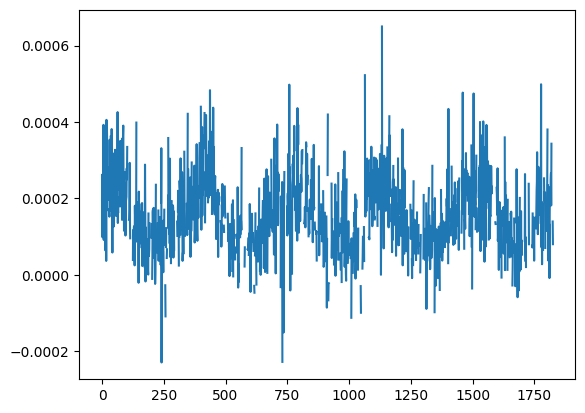

In [34]:
import matplotlib.pyplot as plt
plt.plot(Colombo_Data_pd['HCHO reading'])

##Plot of HCHO level Average per Month

In [35]:
from pyspark.sql.functions import date_format, current_date, month, avg

def plot_HCHO_level_average_vs_month_graph(df, name):
  df_monthly_avg_data = df.groupBy(date_format('Current Date', 'yyyy-MM').alias('month')).agg(avg('HCHO reading').alias('Monthly Average HCHO level'))
  df_monthly_avg_data_sorted = df_monthly_avg_data.orderBy('month')
  pandas_df = df_monthly_avg_data_sorted.toPandas()

  # Plot the data
  plt.figure(figsize=(10, 6))
  plt.plot(pandas_df['month'], pandas_df['Monthly Average HCHO level'], marker='o', color='b')

  # Add title and labels
  plt.title(f'Monthly Average HCHO Level in {name}')
  plt.xlabel('Month')
  plt.ylabel('Average HCHO Level')

  # Rotate x-axis labels for better readability
  plt.xticks(rotation=90)

  # Display the plot
  plt.grid(True)
  plt.tight_layout()
  plt.show()

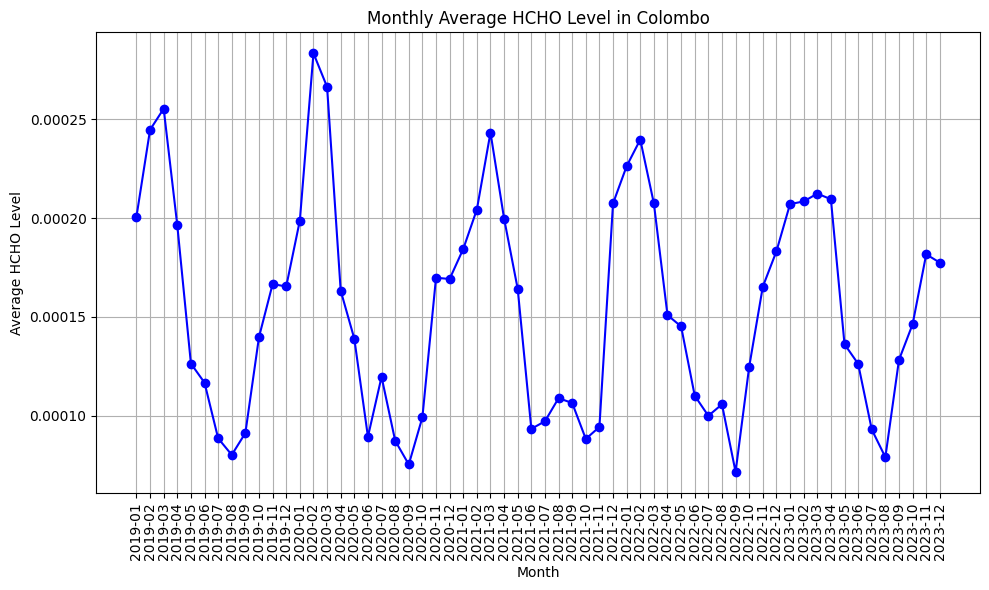

In [36]:
plot_HCHO_level_average_vs_month_graph(Colombo_Data, 'Colombo')

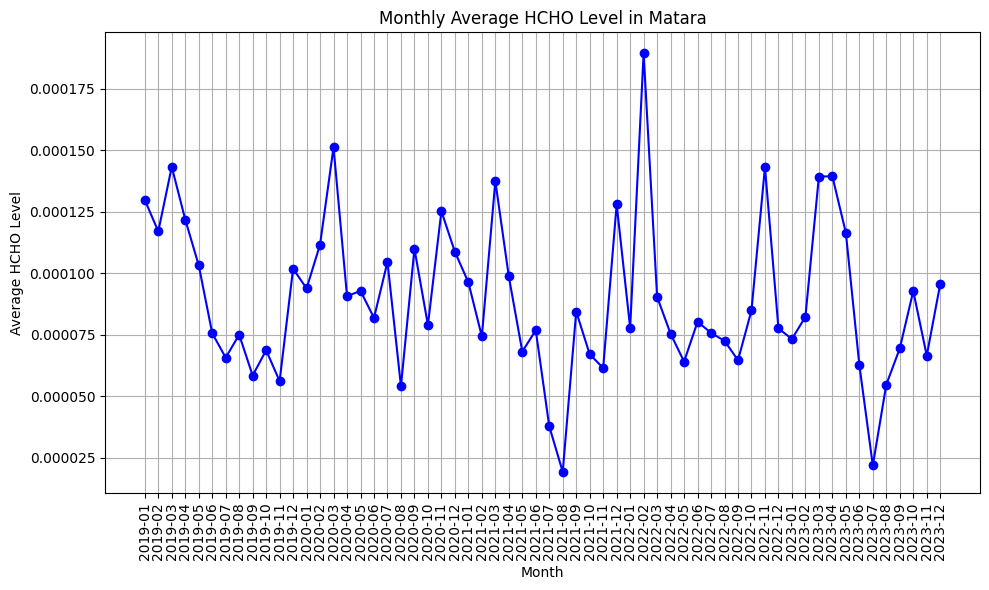

In [37]:
plot_HCHO_level_average_vs_month_graph(Deniyaya_Matara_Data, 'Matara')

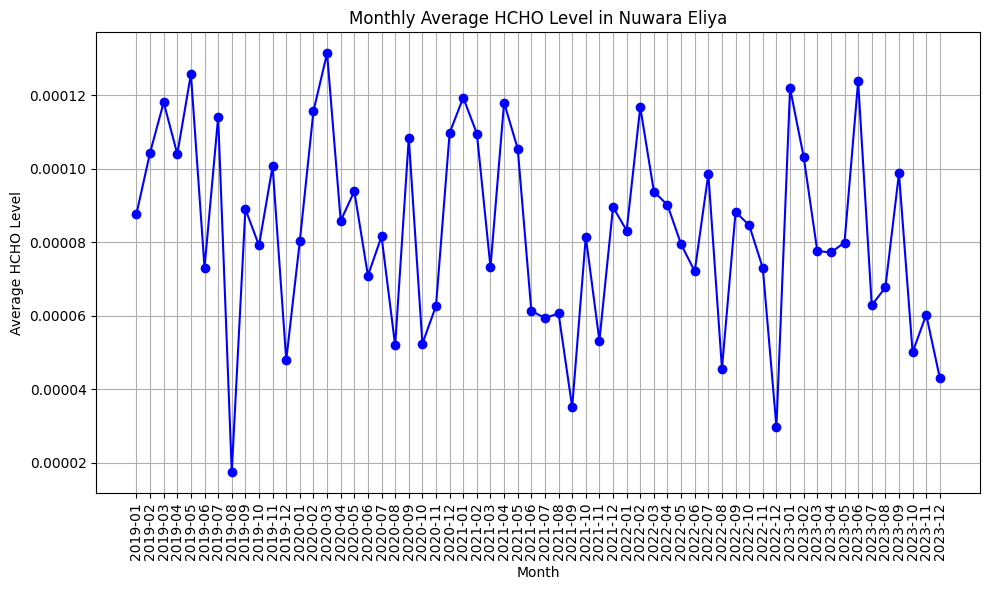

In [38]:
plot_HCHO_level_average_vs_month_graph(Nuwara_Eliya_Data, 'Nuwara Eliya')

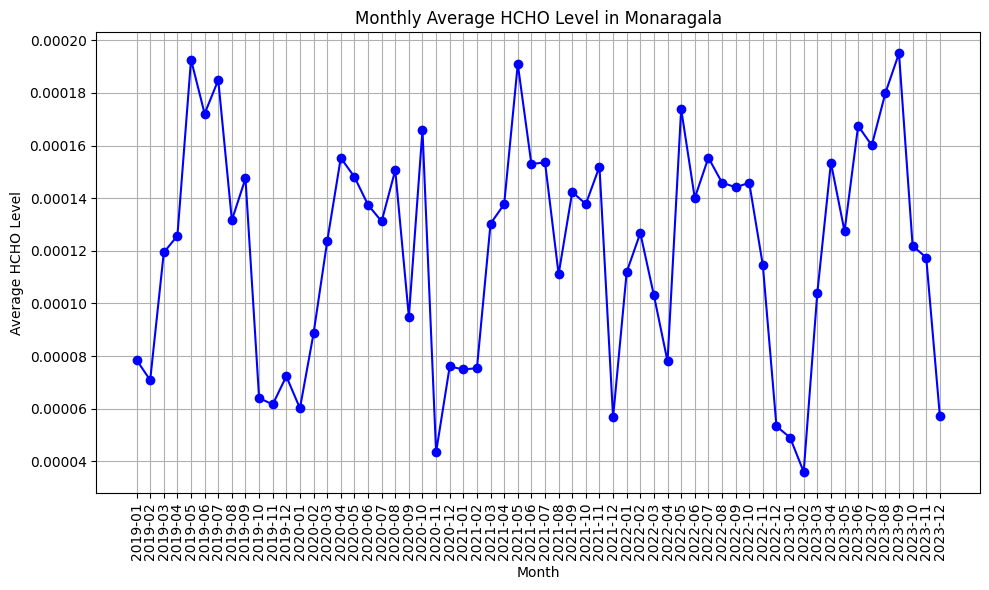

In [39]:
plot_HCHO_level_average_vs_month_graph(Monaragala_Data, 'Monaragala')

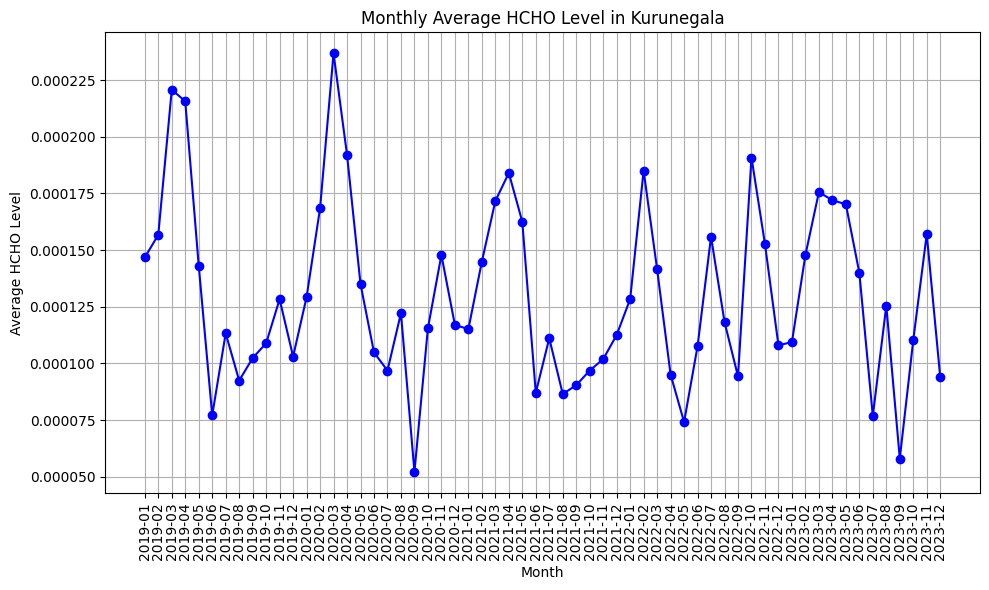

In [40]:
plot_HCHO_level_average_vs_month_graph(Kurunegala_Data, 'Kurunegala')

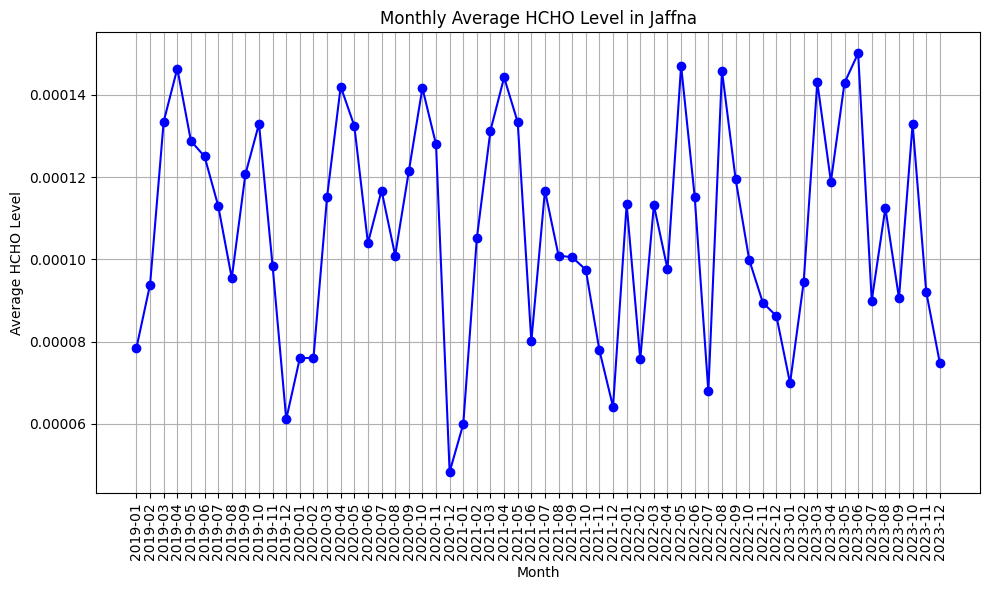

In [41]:
plot_HCHO_level_average_vs_month_graph(Jaffna_Data, 'Jaffna')

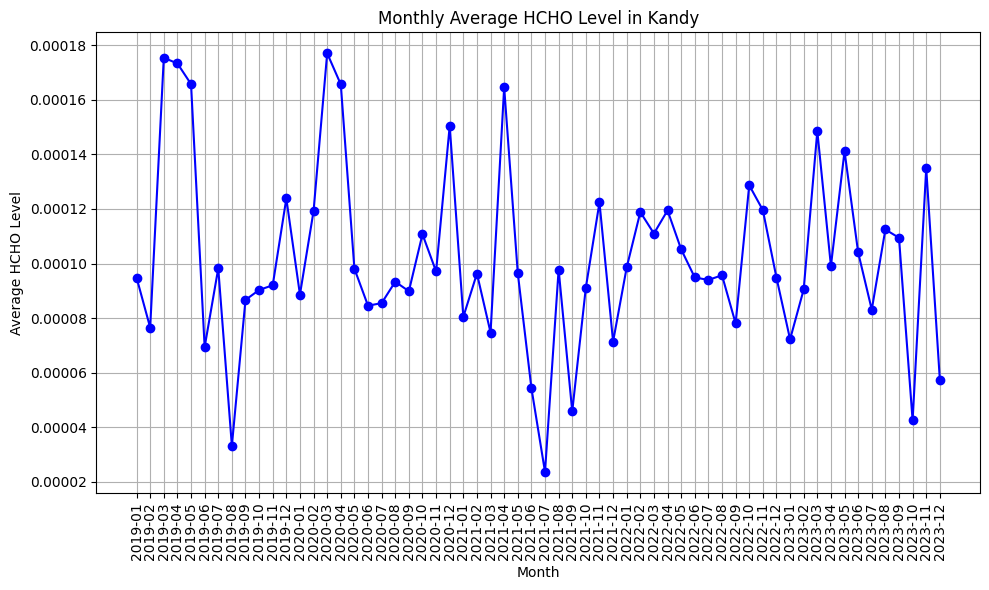

In [42]:
plot_HCHO_level_average_vs_month_graph(kan_data, 'Kandy')

##Plot of HCHO levels average per week

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.functions import lit, weekofyear

def plot_HCHO_average_vs_week(df, city):
    # Initialize an empty DataFrame to accumulate data for all years
    combined_df = pd.DataFrame(columns=['week', 'year', 'average_HCHO_level'])

    for year in [2019, 2020, 2021, 2022, 2023]:
        df_year = df.filter((col('Current Date') >= f'{year}-01-01') & (col('Current Date') < f'{year + 1}-01-01'))
        # Calculate weekly averages for each location
        weekly_avg_data = df_year.groupBy(weekofyear('Current Date').alias('week')).agg(avg('HCHO reading').alias('average_HCHO_level'))
        weekly_avg_data = weekly_avg_data.orderBy('week')
        weekly_avg_data = weekly_avg_data.withColumn('year', lit(year))

        # Convert Spark DataFrame to Pandas DataFrame
        weekly_avg_data_pd = weekly_avg_data.toPandas()

        # Append data to the combined DataFrame
        combined_df = pd.concat([combined_df, weekly_avg_data_pd], ignore_index=True)

    # Plotting
    plt.figure(figsize=(12, 6))
    for year in combined_df['year'].unique():
        year_data = combined_df[combined_df['year'] == year]
        plt.plot(year_data['week'], year_data['average_HCHO_level'], marker='o', label=year)

    # Add title and labels
    plt.title(f'Weekly Average HCHO Level in {city} (2019-2023)')
    plt.xlabel('Week')
    plt.ylabel('Average HCHO Level')
    plt.legend(title='Year', loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


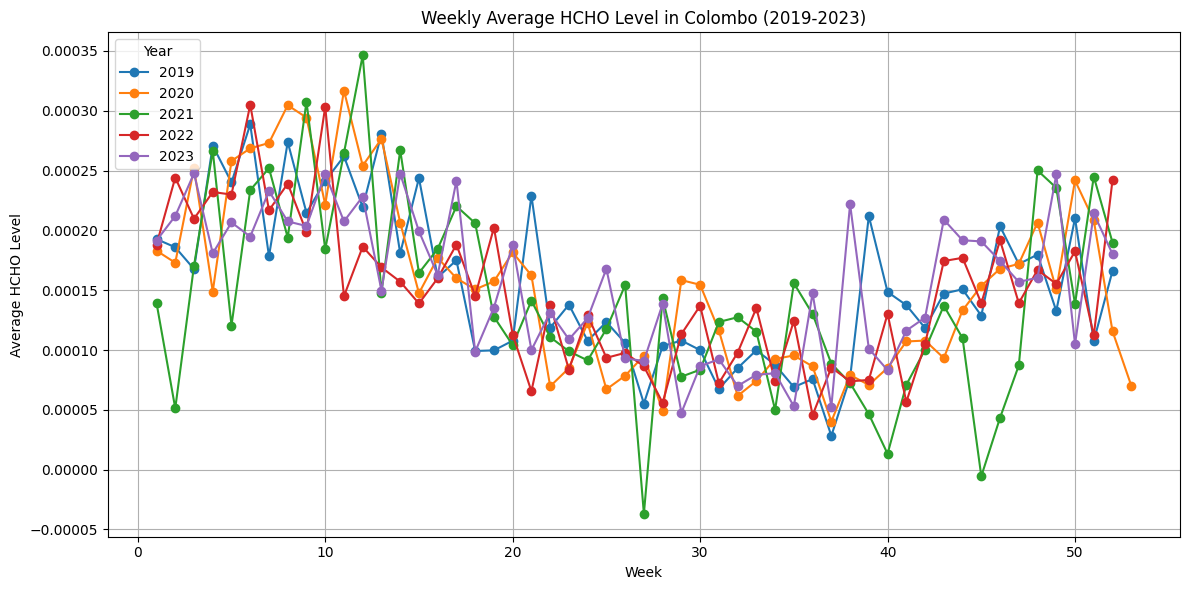

In [44]:
plot_HCHO_average_vs_week(Colombo_Data, 'Colombo')

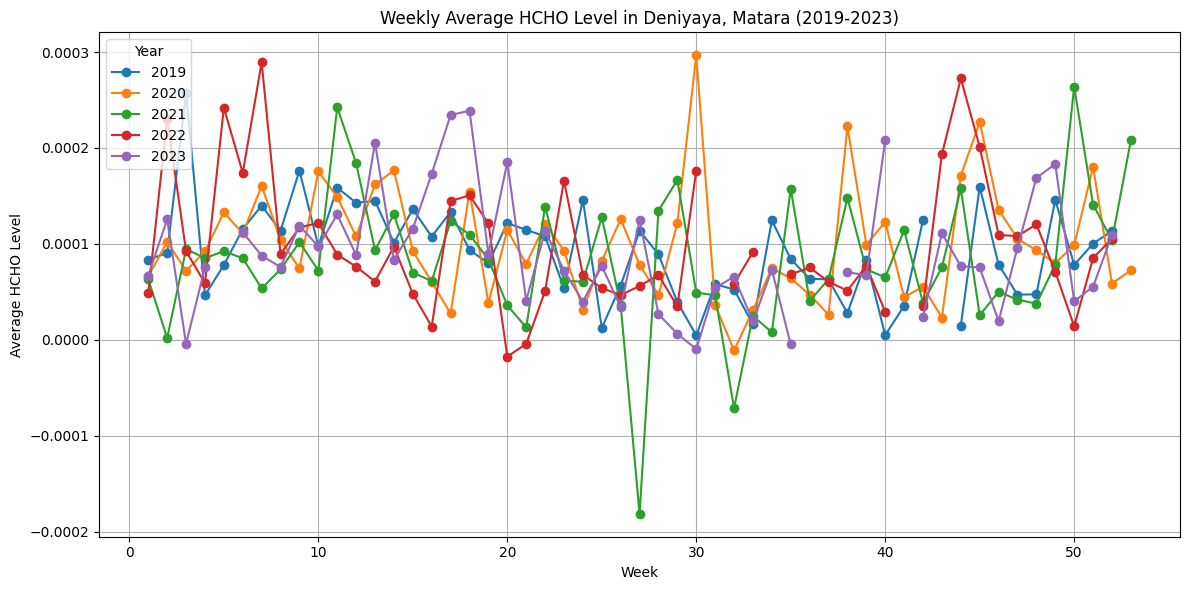

In [45]:
plot_HCHO_average_vs_week(Deniyaya_Matara_Data, 'Deniyaya, Matara')

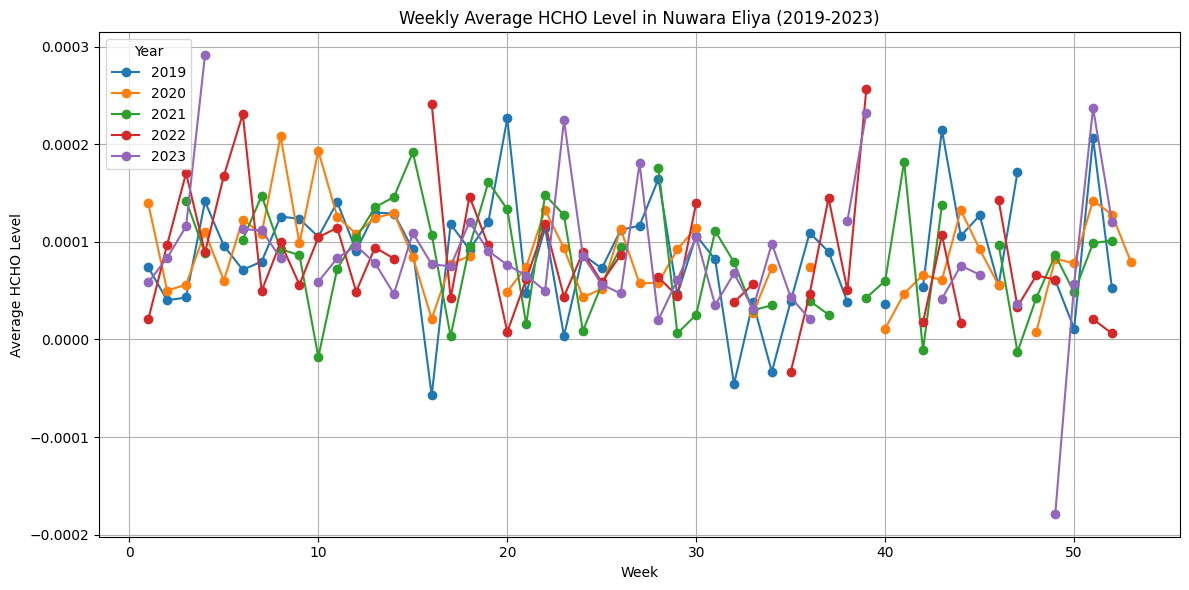

In [46]:
plot_HCHO_average_vs_week(Nuwara_Eliya_Data, 'Nuwara Eliya')

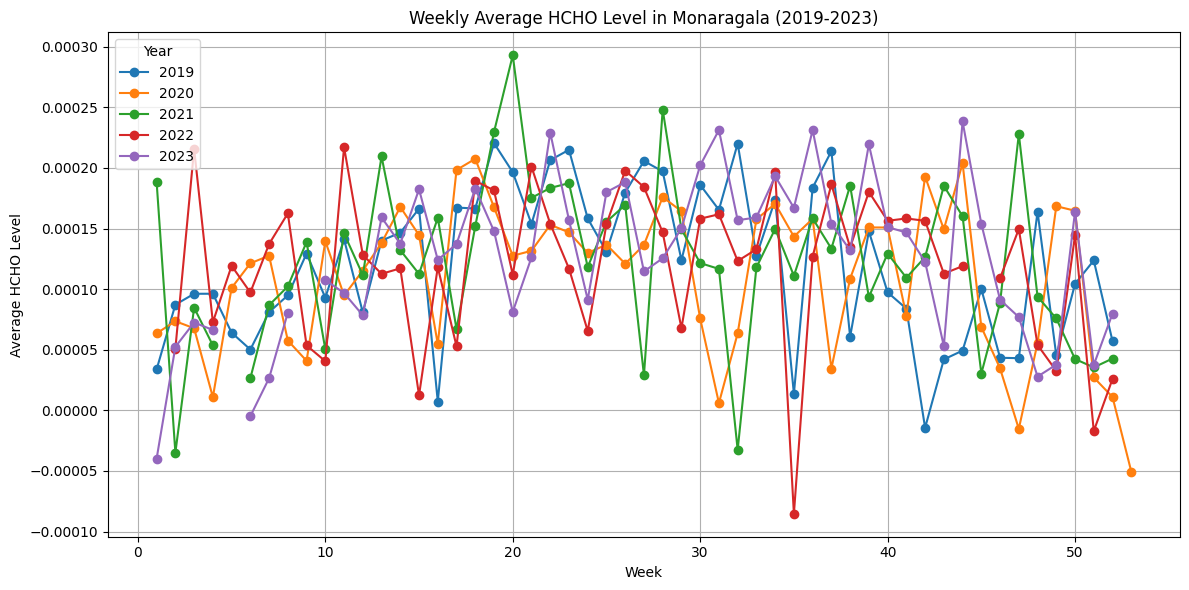

In [47]:
plot_HCHO_average_vs_week(Monaragala_Data, 'Monaragala')

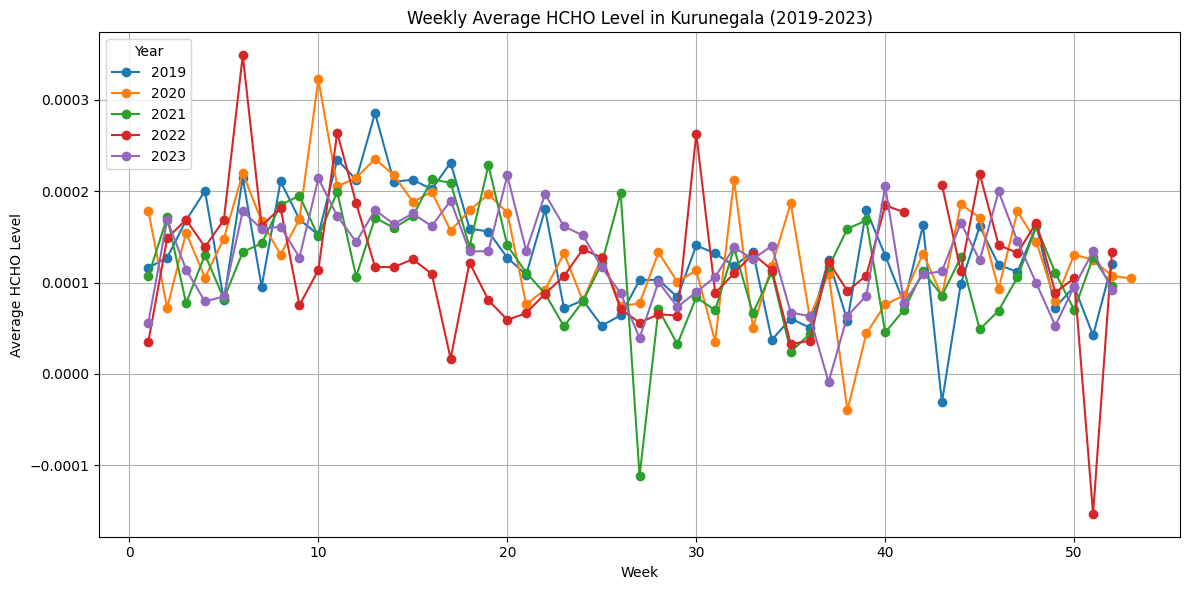

In [48]:
plot_HCHO_average_vs_week(Kurunegala_Data, 'Kurunegala')

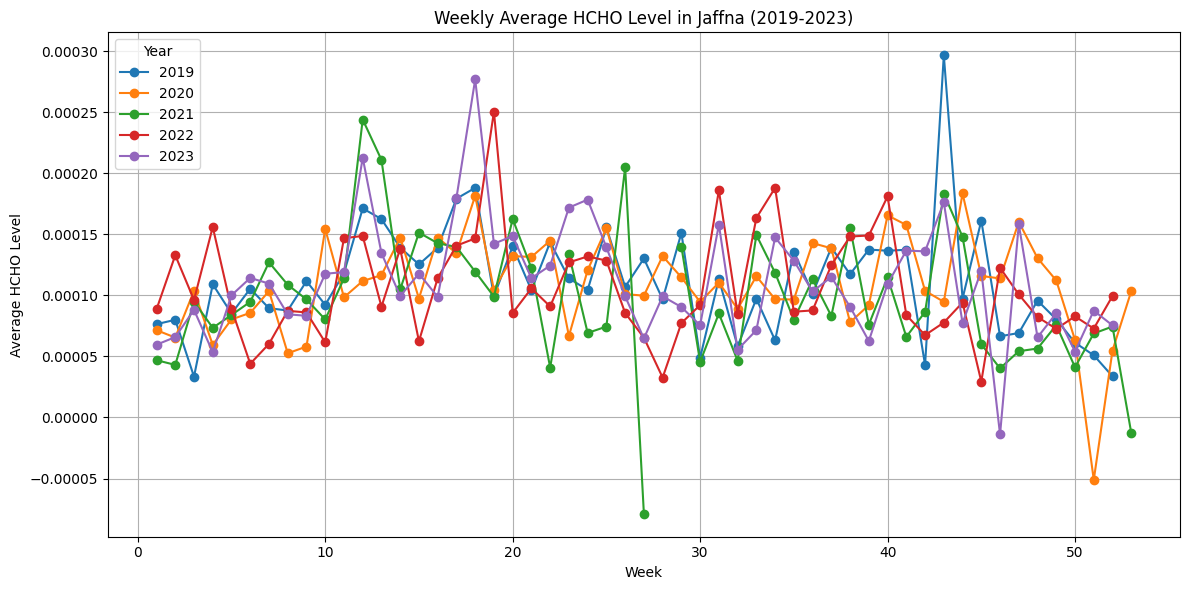

In [49]:
plot_HCHO_average_vs_week(Jaffna_Data, 'Jaffna')

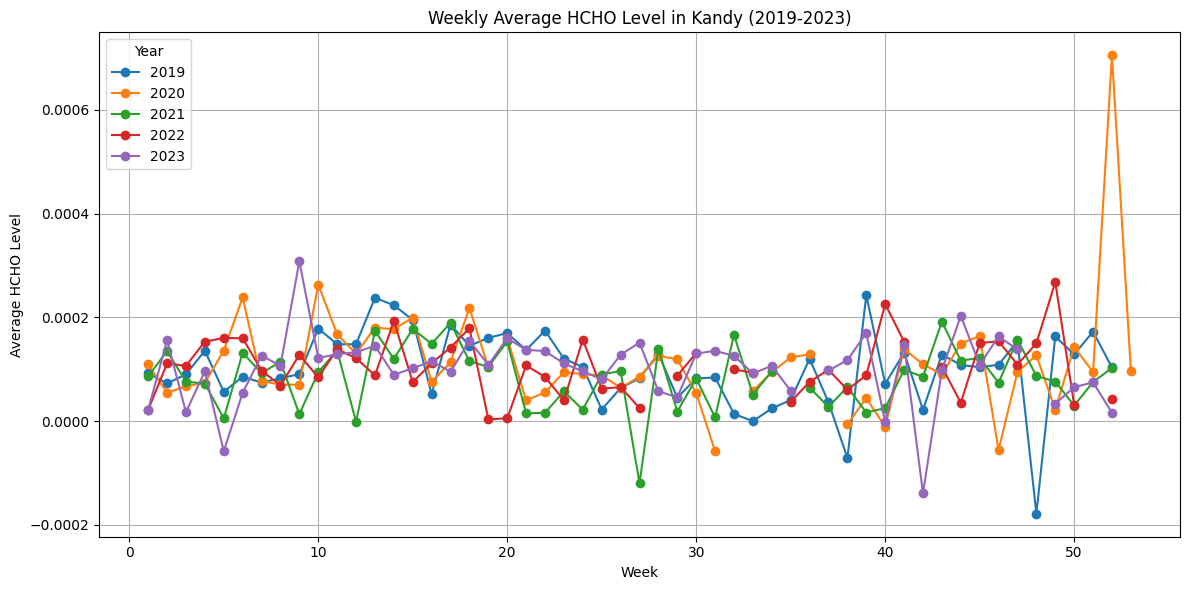

In [50]:
plot_HCHO_average_vs_week(kan_data, 'Kandy')

##Handlng outliers

In [51]:
from pyspark.sql.functions import when

Colombo_Data_positive = Colombo_Data.withColumn("HCHO reading", when(col("HCHO reading") < 0, 0).otherwise(col("HCHO reading")))
Deniyaya_Matara_Data_positive = Deniyaya_Matara_Data.withColumn("HCHO reading", when(col("HCHO reading") < 0, 0).otherwise(col("HCHO reading")))
Nuwara_Eliya_Data_positive = Nuwara_Eliya_Data.withColumn("HCHO reading", when(col("HCHO reading") < 0, 0).otherwise(col("HCHO reading")))
Monaragala_Data_positive = Monaragala_Data.withColumn("HCHO reading", when(col("HCHO reading") < 0, 0).otherwise(col("HCHO reading")))
Kurunegala_Data_positive = Kurunegala_Data.withColumn("HCHO reading", when(col("HCHO reading") < 0, 0).otherwise(col("HCHO reading")))
Jaffna_Data_positive = Jaffna_Data.withColumn("HCHO reading", when(col("HCHO reading") < 0, 0).otherwise(col("HCHO reading")))
kan_data_positive = kan_data.withColumn("HCHO reading", when(col("HCHO reading") < 0, 0).otherwise(col("HCHO reading")))


In [52]:
row_count = Colombo_Data_positive.count()

print("Number of rows from 2019-01-01 to 2023-12-31:", row_count)

Number of rows from 2019-01-01 to 2023-12-31: 1826


##Handling null values using the mean

In [53]:
Colombo_Data.show()

+--------------------+--------------+------------+----------+
|        HCHO reading|      Location|Current Date| Next Date|
+--------------------+--------------+------------+----------+
|1.969834395781014...|Colombo Proper|  2019-01-01|2019-01-02|
|2.625522171968594...|Colombo Proper|  2019-01-02|2019-01-03|
|9.852118897938794E-5|Colombo Proper|  2019-01-03|2019-01-04|
|2.099320518114242E-4|Colombo Proper|  2019-01-04|2019-01-05|
|1.785337298892930...|Colombo Proper|  2019-01-05|2019-01-06|
|1.082296700235670...|Colombo Proper|  2019-01-06|2019-01-07|
|3.926829280477309...|Colombo Proper|  2019-01-07|2019-01-08|
|9.153156350685351E-5|Colombo Proper|  2019-01-08|2019-01-09|
|1.205978992853015...|Colombo Proper|  2019-01-09|2019-01-10|
|1.297723562983258...|Colombo Proper|  2019-01-10|2019-01-11|
|2.239188166801278...|Colombo Proper|  2019-01-11|2019-01-12|
|1.569418094178759...|Colombo Proper|  2019-01-12|2019-01-13|
|                NULL|Colombo Proper|  2019-01-13|2019-01-14|
|1.33629

In [54]:
from pyspark.sql.functions import date_format

# Create variables for other months with the 'month' column derived from 'Current Date'
Deniyaya_Matara_Data_with_month = Deniyaya_Matara_Data_positive.withColumn("month", date_format('Current Date', 'yyyy-MM'))
Nuwara_Eliya_Data_with_month = Nuwara_Eliya_Data_positive.withColumn("month", date_format('Current Date', 'yyyy-MM'))
Monaragala_Data_with_month = Monaragala_Data_positive.withColumn("month", date_format('Current Date', 'yyyy-MM'))
Kurunegala_Data_with_month = Kurunegala_Data_positive.withColumn("month", date_format('Current Date', 'yyyy-MM'))
Jaffna_Data_with_month = Jaffna_Data_positive.withColumn("month", date_format('Current Date', 'yyyy-MM'))
kan_data_with_month = kan_data_positive.withColumn("month", date_format('Current Date', 'yyyy-MM'))
Colombo_Data_with_month = Colombo_Data_positive.withColumn("month", date_format('Current Date', 'yyyy-MM'))

# Show the DataFrame with the added column
Colombo_Data_with_month.show()

+--------------------+--------------+------------+----------+-------+
|        HCHO reading|      Location|Current Date| Next Date|  month|
+--------------------+--------------+------------+----------+-------+
|1.969834395781014...|Colombo Proper|  2019-01-01|2019-01-02|2019-01|
|2.625522171968594...|Colombo Proper|  2019-01-02|2019-01-03|2019-01|
|9.852118897938794E-5|Colombo Proper|  2019-01-03|2019-01-04|2019-01|
|2.099320518114242E-4|Colombo Proper|  2019-01-04|2019-01-05|2019-01|
|1.785337298892930...|Colombo Proper|  2019-01-05|2019-01-06|2019-01|
|1.082296700235670...|Colombo Proper|  2019-01-06|2019-01-07|2019-01|
|3.926829280477309...|Colombo Proper|  2019-01-07|2019-01-08|2019-01|
|9.153156350685351E-5|Colombo Proper|  2019-01-08|2019-01-09|2019-01|
|1.205978992853015...|Colombo Proper|  2019-01-09|2019-01-10|2019-01|
|1.297723562983258...|Colombo Proper|  2019-01-10|2019-01-11|2019-01|
|2.239188166801278...|Colombo Proper|  2019-01-11|2019-01-12|2019-01|
|1.569418094178759..

In [55]:
row_count = Colombo_Data_with_month.count()

print("Number of rows from 2019-01-01 to 2023-12-31:", row_count)

Number of rows from 2019-01-01 to 2023-12-31: 1826


In [56]:
from pyspark.sql.functions import col
null_hcho_dates = []

# Filter the DataFrame for rows with null values in the 'HCHO reading' column
null_hcho_rows = Colombo_Data_with_month.filter(col('HCHO reading').isNull())

# Iterate over the DataFrame and extract 'Current Date' values
for row in null_hcho_rows.collect():
    current_date = row['Current Date']
    null_hcho_dates.append(current_date)

# Print the list of current dates with null HCHO readings
print(null_hcho_dates)

# Show the filtered DataFrame
# null_hcho_rows.show()

['2019-01-13', '2019-01-29', '2019-02-04', '2019-02-14', '2019-03-01', '2019-03-02', '2019-03-09', '2019-03-18', '2019-03-21', '2019-04-03', '2019-04-14', '2019-04-15', '2019-04-16', '2019-04-17', '2019-04-19', '2019-04-26', '2019-04-27', '2019-04-28', '2019-04-29', '2019-04-30', '2019-05-02', '2019-05-03', '2019-05-05', '2019-05-21', '2019-05-22', '2019-05-24', '2019-06-05', '2019-06-06', '2019-06-07', '2019-06-10', '2019-06-16', '2019-06-20', '2019-06-21', '2019-07-09', '2019-07-13', '2019-07-14', '2019-07-15', '2019-07-17', '2019-07-18', '2019-07-19', '2019-07-22', '2019-08-02', '2019-08-08', '2019-08-10', '2019-08-12', '2019-08-13', '2019-08-16', '2019-08-22', '2019-08-23', '2019-08-26', '2019-08-27', '2019-09-11', '2019-09-12', '2019-09-13', '2019-09-16', '2019-09-19', '2019-09-22', '2019-09-23', '2019-09-24', '2019-09-25', '2019-10-06', '2019-10-11', '2019-10-12', '2019-10-21', '2019-10-22', '2019-10-24', '2019-10-25', '2019-10-26', '2019-10-27', '2019-10-28', '2019-10-30', '2019

In [57]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg, col, date_format

def replace_null_with_mean(df):
    spark = SparkSession.builder.getOrCreate()

    # Calculate monthly averages
    df_monthly_avg_data = df.groupBy(date_format('Current Date', 'yyyy-MM').alias('month')).agg(avg('HCHO reading').alias('Monthly Average HCHO level'))
    df_monthly_avg_data = df_monthly_avg_data.orderBy('month')
    # Convert DataFrame to Pandas
    df_monthly_avg_pd = df_monthly_avg_data.toPandas()
    df_pd = df.toPandas()

    # Create a dictionary to store monthly averages
    monthly_avg = dict(zip(df_monthly_avg_pd['month'], df_monthly_avg_pd['Monthly Average HCHO level']))

    # Fill null values with the corresponding monthly average
    for index, row in df_pd.iterrows():
        if pd.isnull(row['HCHO reading']):
            month_value = row['month']
            monthly_average = monthly_avg.get(month_value, None)
            if monthly_average is not None:
                df_pd.at[index, 'HCHO reading'] = monthly_average

    # Convert back to PySpark DataFrame
    df = spark.createDataFrame(df_pd)

    return df

In [58]:
# Call the function
Colombo_Data_mean_filled = replace_null_with_mean(Colombo_Data_with_month)
Colombo_Data_mean_filled.show()

+--------------------+--------------+------------+----------+-------+
|        HCHO reading|      Location|Current Date| Next Date|  month|
+--------------------+--------------+------------+----------+-------+
|1.969834395781014...|Colombo Proper|  2019-01-01|2019-01-02|2019-01|
|2.625522171968594...|Colombo Proper|  2019-01-02|2019-01-03|2019-01|
|9.852118897938794E-5|Colombo Proper|  2019-01-03|2019-01-04|2019-01|
|2.099320518114242E-4|Colombo Proper|  2019-01-04|2019-01-05|2019-01|
|1.785337298892930...|Colombo Proper|  2019-01-05|2019-01-06|2019-01|
|1.082296700235670...|Colombo Proper|  2019-01-06|2019-01-07|2019-01|
|3.926829280477309...|Colombo Proper|  2019-01-07|2019-01-08|2019-01|
|9.153156350685351E-5|Colombo Proper|  2019-01-08|2019-01-09|2019-01|
|1.205978992853015...|Colombo Proper|  2019-01-09|2019-01-10|2019-01|
|1.297723562983258...|Colombo Proper|  2019-01-10|2019-01-11|2019-01|
|2.239188166801278...|Colombo Proper|  2019-01-11|2019-01-12|2019-01|
|1.569418094178759..

In [59]:
from pyspark.sql.functions import col

# Filter the DataFrame for rows with dates matching the ones in null_hcho_dates
filtered_rows = Colombo_Data_mean_filled.filter(col('Current Date').isin(null_hcho_dates))

# Show the filtered DataFrame
filtered_rows.show()

+--------------------+--------------+------------+----------+-------+
|        HCHO reading|      Location|Current Date| Next Date|  month|
+--------------------+--------------+------------+----------+-------+
|2.006723443456117...|Colombo Proper|  2019-01-13|2019-01-14|2019-01|
|2.006723443456117...|Colombo Proper|  2019-01-29|2019-01-30|2019-01|
|2.446558971944704E-4|Colombo Proper|  2019-02-04|2019-02-05|2019-02|
|2.446558971944704E-4|Colombo Proper|  2019-02-14|2019-02-15|2019-02|
|2.553024491482505...|Colombo Proper|  2019-03-01|2019-03-02|2019-03|
|2.553024491482505...|Colombo Proper|  2019-03-02|2019-03-03|2019-03|
|2.553024491482505...|Colombo Proper|  2019-03-09|2019-03-10|2019-03|
|2.553024491482505...|Colombo Proper|  2019-03-18|2019-03-19|2019-03|
|2.553024491482505...|Colombo Proper|  2019-03-21|2019-03-22|2019-03|
|1.963118698358205...|Colombo Proper|  2019-04-03|2019-04-04|2019-04|
|1.963118698358205...|Colombo Proper|  2019-04-14|2019-04-15|2019-04|
|1.963118698358205..

In [60]:
row_count = Colombo_Data_mean_filled.count()

print("Number of rows from 2019-01-01 to 2023-12-31:", row_count)

Number of rows from 2019-01-01 to 2023-12-31: 1826


In [61]:
# Replace null values with the mean for other months
Deniyaya_Matara_Data_mean_filled = replace_null_with_mean(Deniyaya_Matara_Data_with_month)
Nuwara_Eliya_Data_mean_filled = replace_null_with_mean(Nuwara_Eliya_Data_with_month)
Monaragala_Data_mean_filled = replace_null_with_mean(Monaragala_Data_with_month)
Kurunegala_Data_mean_filled = replace_null_with_mean(Kurunegala_Data_with_month)
Jaffna_Data_mean_filled = replace_null_with_mean(Jaffna_Data_with_month)
kan_data_mean_filled = replace_null_with_mean(kan_data_with_month)


In [62]:
null_values_per_column(Colombo_Data_mean_filled, 'Colombo')


no null values
no null values
no null values
no null values
no null values


##Plot of HCHO Avg per week after handling outliers and null values

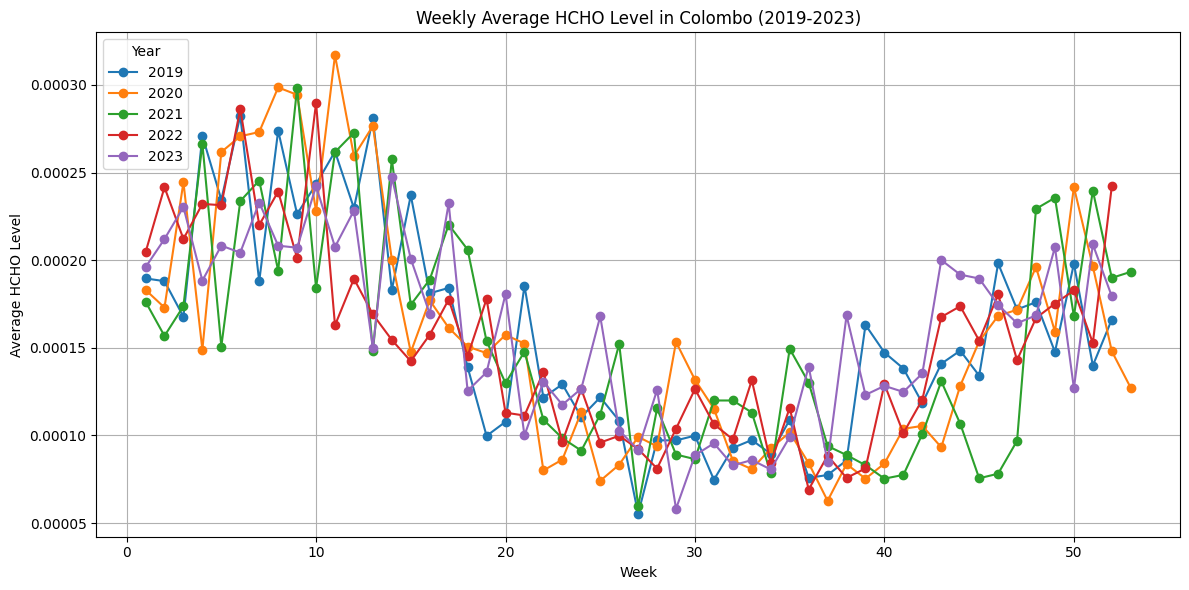

In [63]:
plot_HCHO_average_vs_week(Colombo_Data_mean_filled, 'Colombo')

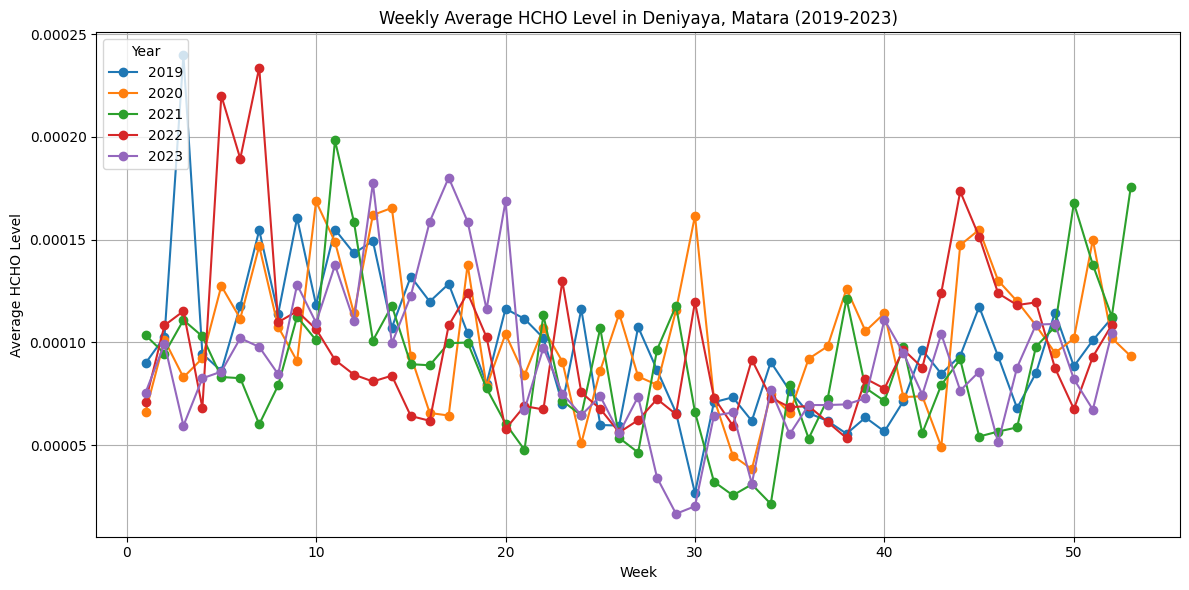

In [64]:
plot_HCHO_average_vs_week(Deniyaya_Matara_Data_mean_filled, 'Deniyaya, Matara')

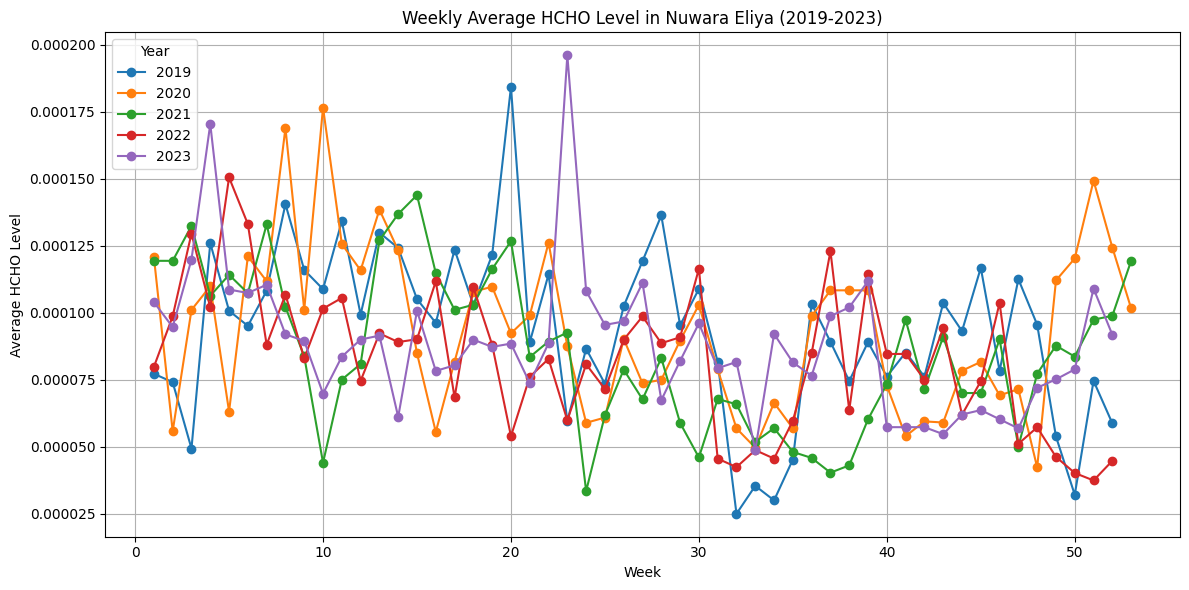

In [65]:
plot_HCHO_average_vs_week(Nuwara_Eliya_Data_mean_filled, 'Nuwara Eliya')

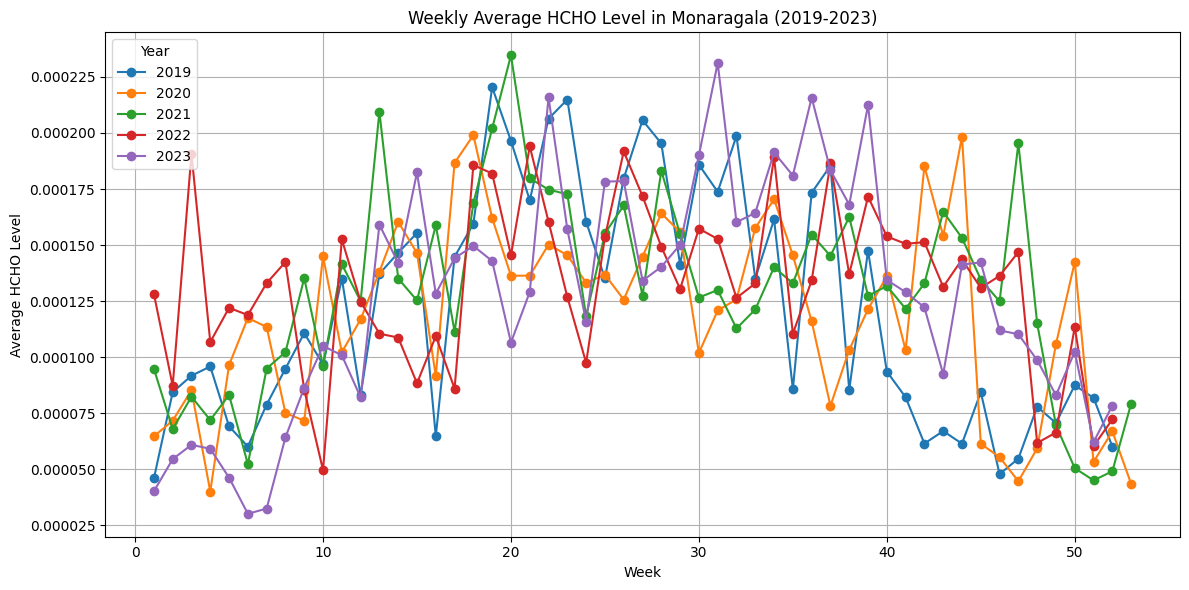

In [66]:
plot_HCHO_average_vs_week(Monaragala_Data_mean_filled, 'Monaragala')

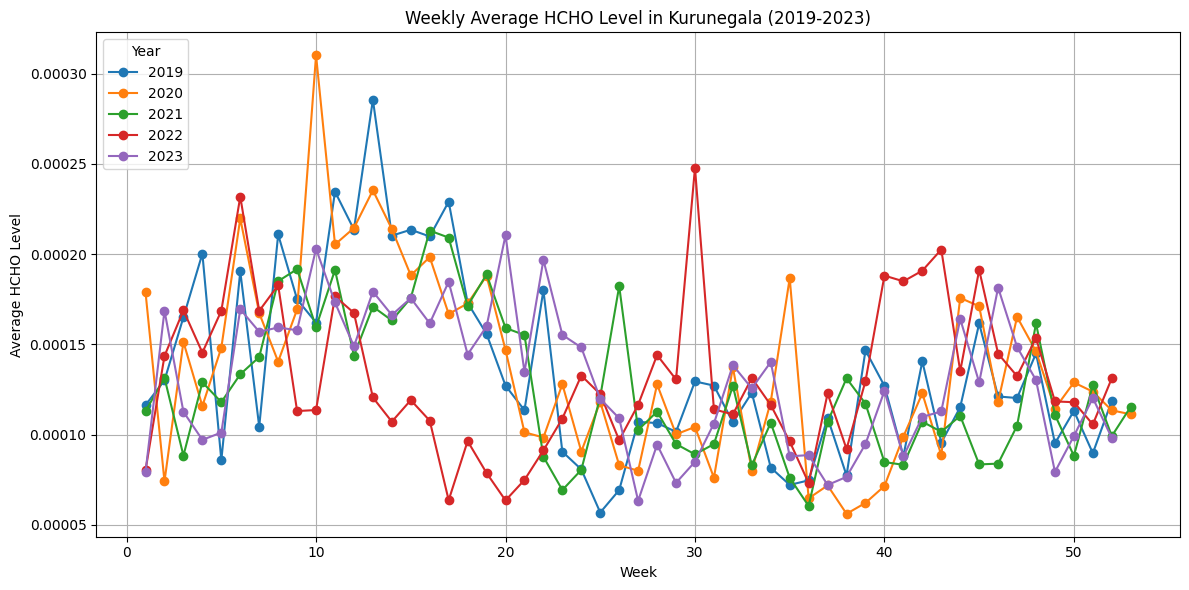

In [67]:
plot_HCHO_average_vs_week(Kurunegala_Data_mean_filled, 'Kurunegala')

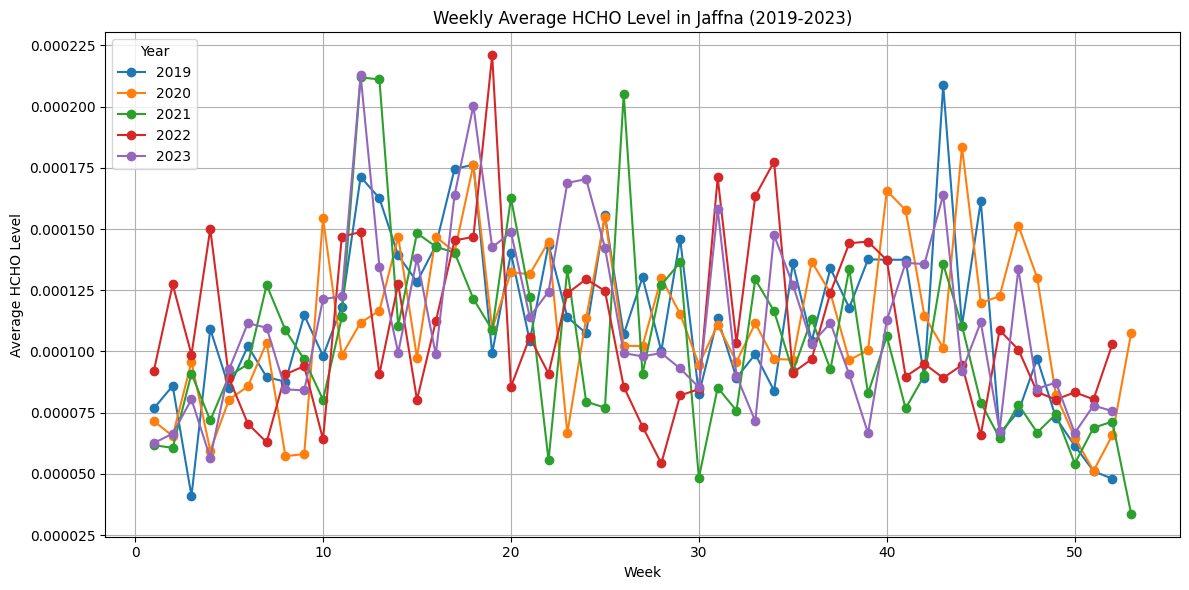

In [68]:
plot_HCHO_average_vs_week(Jaffna_Data_mean_filled, 'Jaffna')

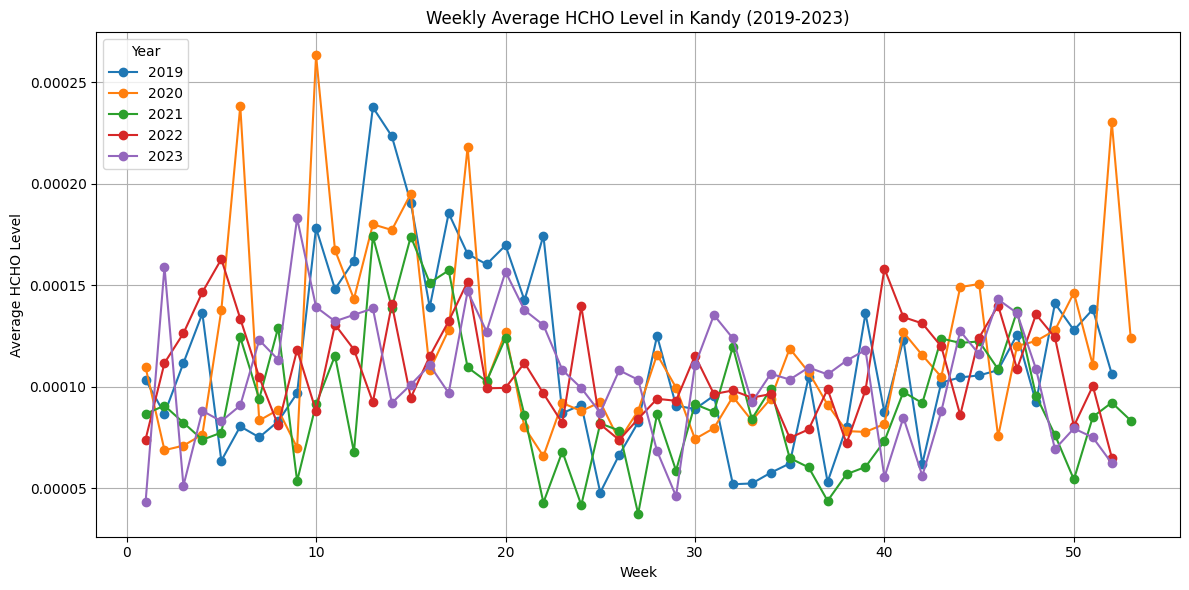

In [69]:
plot_HCHO_average_vs_week(kan_data_mean_filled, 'Kandy')

##Loading Temp Data

Reading Temp Data for Kur, Col, Nuw

In [70]:
kur_col_nuw_precip_temp = spark.read.csv("/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/3620606.csv", header=True)

# Show the DataFrame
kur_col_nuw_precip_temp.show()


+-----------+--------------+----------+----+----+----+----+
|    STATION|          NAME|      DATE|PRCP|TAVG|TMAX|TMIN|
+-----------+--------------+----------+----+----+----+----+
|CEM00043441|KURUNEGALA, CE|2019-01-02|0.00|  78|NULL|  72|
|CEM00043441|KURUNEGALA, CE|2019-01-03|0.00|  81|  87|  71|
|CEM00043441|KURUNEGALA, CE|2019-01-04|0.00|  83|  88|  69|
|CEM00043441|KURUNEGALA, CE|2019-01-05|0.00|  84|  90|  65|
|CEM00043441|KURUNEGALA, CE|2019-01-06|0.00|  82|  88|  71|
|CEM00043441|KURUNEGALA, CE|2019-01-07|0.00|  80|  89|  68|
|CEM00043441|KURUNEGALA, CE|2019-01-08|0.00|  82|  90|  71|
|CEM00043441|KURUNEGALA, CE|2019-01-09|0.00|  83|  89|  71|
|CEM00043441|KURUNEGALA, CE|2019-01-10|0.00|  81|  88|  72|
|CEM00043441|KURUNEGALA, CE|2019-01-11|0.00|  85|  90|  73|
|CEM00043441|KURUNEGALA, CE|2019-01-12|0.00|  84|  90|  74|
|CEM00043441|KURUNEGALA, CE|2019-01-13|0.00|  82|  87|  72|
|CEM00043441|KURUNEGALA, CE|2019-01-14|0.00|  80|  86|  74|
|CEM00043441|KURUNEGALA, CE|2019-01-15|0

In [71]:
Colombo_Temp_Data = kur_col_nuw_precip_temp.filter(kur_col_nuw_precip_temp['NAME'] == 'COLOMBO, CE')
Kurunegala_Temp_Data = kur_col_nuw_precip_temp.filter(kur_col_nuw_precip_temp['NAME'] == 'KURUNEGALA, CE')
Nuwara_Eliya_Temp_Data = kur_col_nuw_precip_temp.filter(kur_col_nuw_precip_temp['NAME'] == 'NUWARA ELIYA, CE')


In [72]:
null_values_per_column(Colombo_Temp_Data, 'Colombo')

no null values
no null values
no null values
City: Colombo, Column: 'PRCP', Number of null values: 9
no null values
City: Colombo, Column: 'TMAX', Number of null values: 210
City: Colombo, Column: 'TMIN', Number of null values: 318


In [73]:
Colombo_Temp_Data.show()
Kurunegala_Temp_Data.show()
Nuwara_Eliya_Temp_Data.show()

+-----------+-----------+----------+----+----+----+----+
|    STATION|       NAME|      DATE|PRCP|TAVG|TMAX|TMIN|
+-----------+-----------+----------+----+----+----+----+
|CEM00043466|COLOMBO, CE|2019-01-01|0.00|  81|  89|  74|
|CEM00043466|COLOMBO, CE|2019-01-02|0.00|  78|NULL|  74|
|CEM00043466|COLOMBO, CE|2019-01-03|0.00|  81|  90|  74|
|CEM00043466|COLOMBO, CE|2019-01-04|0.00|  81|  91|  72|
|CEM00043466|COLOMBO, CE|2019-01-05|0.00|  81|  90|  74|
|CEM00043466|COLOMBO, CE|2019-01-06|0.00|  81|  88|  73|
|CEM00043466|COLOMBO, CE|2019-01-07|0.00|  81|  87|  73|
|CEM00043466|COLOMBO, CE|2019-01-08|0.00|  82|  90|  74|
|CEM00043466|COLOMBO, CE|2019-01-09|0.00|  83|  92|  75|
|CEM00043466|COLOMBO, CE|2019-01-10|0.00|  82|  88|  75|
|CEM00043466|COLOMBO, CE|2019-01-11|0.00|  82|  89|  77|
|CEM00043466|COLOMBO, CE|2019-01-12|0.00|  82|  90|  76|
|CEM00043466|COLOMBO, CE|2019-01-13|0.00|  82|  88|  76|
|CEM00043466|COLOMBO, CE|2019-01-14|0.52|  82|  89|  75|
|CEM00043466|COLOMBO, CE|2019-0

In [74]:
Nuwara_Eliya_Data_mean_filled.show()

+--------------------+-------------------+------------+----------+-------+
|        HCHO reading|           Location|Current Date| Next Date|  month|
+--------------------+-------------------+------------+----------+-------+
|8.772061942392279E-5|Nuwara Eliya Proper|  2019-01-01|2019-01-02|2019-01|
|8.772061942392279E-5|Nuwara Eliya Proper|  2019-01-02|2019-01-03|2019-01|
|1.908293886956784...|Nuwara Eliya Proper|  2019-01-03|2019-01-04|2019-01|
|5.097625917127737...|Nuwara Eliya Proper|  2019-01-04|2019-01-05|2019-01|
|6.456645496655256E-5|Nuwara Eliya Proper|  2019-01-05|2019-01-06|2019-01|
|8.982348709518115E-5|Nuwara Eliya Proper|  2019-01-06|2019-01-07|2019-01|
|4.097797651418246E-5|Nuwara Eliya Proper|  2019-01-07|2019-01-08|2019-01|
|8.772061942392279E-5|Nuwara Eliya Proper|  2019-01-08|2019-01-09|2019-01|
|8.772061942392279E-5|Nuwara Eliya Proper|  2019-01-09|2019-01-10|2019-01|
|8.772061942392279E-5|Nuwara Eliya Proper|  2019-01-10|2019-01-11|2019-01|
|3.914670787137749E-5|Nuw

#joining the 2 datasets

In [75]:
from pyspark.sql.functions import col

def join_Temp_data(df, Temp_df):
    # Perform left join with Temp_df as the left DataFrame
    joined_data = Temp_df.join(
        df,
        Temp_df['Date'] == df['Current Date'],
        how='right'
    )

    return joined_data

In [76]:
Colombo_Data_joined = join_Temp_data(Colombo_Data_mean_filled ,Colombo_Temp_Data)
Colombo_Data_joined.show()


+-----------+-----------+----------+----+----+----+----+--------------------+--------------+------------+----------+-------+
|    STATION|       NAME|      DATE|PRCP|TAVG|TMAX|TMIN|        HCHO reading|      Location|Current Date| Next Date|  month|
+-----------+-----------+----------+----+----+----+----+--------------------+--------------+------------+----------+-------+
|CEM00043466|COLOMBO, CE|2019-01-01|0.00|  81|  89|  74|1.969834395781014...|Colombo Proper|  2019-01-01|2019-01-02|2019-01|
|CEM00043466|COLOMBO, CE|2019-01-02|0.00|  78|NULL|  74|2.625522171968594...|Colombo Proper|  2019-01-02|2019-01-03|2019-01|
|CEM00043466|COLOMBO, CE|2019-01-03|0.00|  81|  90|  74|9.852118897938794E-5|Colombo Proper|  2019-01-03|2019-01-04|2019-01|
|CEM00043466|COLOMBO, CE|2019-01-04|0.00|  81|  91|  72|2.099320518114242E-4|Colombo Proper|  2019-01-04|2019-01-05|2019-01|
|CEM00043466|COLOMBO, CE|2019-01-05|0.00|  81|  90|  74|1.785337298892930...|Colombo Proper|  2019-01-05|2019-01-06|2019-01|


In [77]:
row_count = Colombo_Data_joined.count()

# Print the count
print("Number of rows from 2019-01-01 to 2023-12-31:", row_count)

Number of rows from 2019-01-01 to 2023-12-31: 1826


In [107]:
def get_missing_dates(df, column):
  df_pd = df.toPandas()
  # Define the start date
  start_date = pd.to_datetime('2019-01-01')

  # Initialize a variable to track the expected date
  expected_date = start_date

  # Iterate over the rows of the DataFrame
  for index, row in df_pd.iterrows():
      # Get the current date from the row
      current_date = pd.to_datetime(row[column])

      # Check if the current date matches the expected date
      if current_date != expected_date:
          print(f"Expected: {expected_date}, Actual: {current_date}")

      # Update the expected date for the next iteration
      expected_date = current_date + pd.DateOffset(days=1)

In [109]:
get_missing_dates(Colombo_Temp_Data, 'DATE')

Expected: 2019-02-08 00:00:00, Actual: 2019-02-09 00:00:00
Expected: 2019-04-23 00:00:00, Actual: 2019-04-24 00:00:00
Expected: 2019-04-29 00:00:00, Actual: 2019-04-30 00:00:00
Expected: 2019-06-13 00:00:00, Actual: 2019-06-15 00:00:00
Expected: 2019-06-20 00:00:00, Actual: 2019-06-21 00:00:00
Expected: 2019-06-22 00:00:00, Actual: 2019-06-23 00:00:00
Expected: 2019-08-03 00:00:00, Actual: 2019-08-05 00:00:00
Expected: 2021-02-11 00:00:00, Actual: 2021-02-13 00:00:00
Expected: 2021-02-20 00:00:00, Actual: 2021-02-22 00:00:00
Expected: 2021-08-23 00:00:00, Actual: 2021-08-24 00:00:00
Expected: 2022-01-05 00:00:00, Actual: 2022-01-06 00:00:00
Expected: 2022-01-11 00:00:00, Actual: 2022-01-13 00:00:00
Expected: 2022-01-15 00:00:00, Actual: 2022-01-16 00:00:00
Expected: 2022-01-18 00:00:00, Actual: 2022-01-19 00:00:00
Expected: 2022-01-20 00:00:00, Actual: 2022-01-21 00:00:00
Expected: 2022-01-23 00:00:00, Actual: 2022-01-24 00:00:00
Expected: 2022-01-25 00:00:00, Actual: 2022-01-26 00:00:

In [79]:
Colombo_Data_joined_filtered_date = Colombo_Data_joined.filter(Colombo_Data_joined['Current Date'] == '2019-04-23')
Colombo_Data_joined_filtered_date.show()

+-------+----+----+----+----+----+----+--------------------+--------------+------------+----------+-------+
|STATION|NAME|DATE|PRCP|TAVG|TMAX|TMIN|        HCHO reading|      Location|Current Date| Next Date|  month|
+-------+----+----+----+----+----+----+--------------------+--------------+------------+----------+-------+
|   NULL|NULL|NULL|NULL|NULL|NULL|NULL|2.932244406430172...|Colombo Proper|  2019-04-23|2019-04-24|2019-04|
+-------+----+----+----+----+----+----+--------------------+--------------+------------+----------+-------+



In [80]:
Kurunegala_Data_joined = join_Temp_data(Kurunegala_Data_mean_filled ,Kurunegala_Temp_Data)
Nuwara_Eliya_Data_joined = join_Temp_data(Nuwara_Eliya_Data_mean_filled, Nuwara_Eliya_Temp_Data)

In [81]:
Kurunegala_Data_joined.show()
Nuwara_Eliya_Data_joined.show()

+-----------+--------------+----------+----+----+----+----+--------------------+-----------------+------------+----------+-------+
|    STATION|          NAME|      DATE|PRCP|TAVG|TMAX|TMIN|        HCHO reading|         Location|Current Date| Next Date|  month|
+-----------+--------------+----------+----+----+----+----+--------------------+-----------------+------------+----------+-------+
|       NULL|          NULL|      NULL|NULL|NULL|NULL|NULL|8.829725542537962E-5|Kurunegala Proper|  2019-01-01|2019-01-02|2019-01|
|CEM00043441|KURUNEGALA, CE|2019-01-02|0.00|  78|NULL|  72|1.370787402778218...|Kurunegala Proper|  2019-01-02|2019-01-03|2019-01|
|CEM00043441|KURUNEGALA, CE|2019-01-03|0.00|  81|  87|  71|1.480085027113037E-4|Kurunegala Proper|  2019-01-03|2019-01-04|2019-01|
|CEM00043441|KURUNEGALA, CE|2019-01-04|0.00|  83|  88|  69|                 0.0|Kurunegala Proper|  2019-01-04|2019-01-05|2019-01|
|CEM00043441|KURUNEGALA, CE|2019-01-05|0.00|  84|  90|  65|2.489134742856164E-4|Kur

In [82]:
null_values_per_column(Colombo_Data_joined, 'Colombo')


City: Colombo, Column: 'STATION', Number of null values: 61
City: Colombo, Column: 'NAME', Number of null values: 61
City: Colombo, Column: 'DATE', Number of null values: 61
City: Colombo, Column: 'PRCP', Number of null values: 70
City: Colombo, Column: 'TAVG', Number of null values: 61
City: Colombo, Column: 'TMAX', Number of null values: 270
City: Colombo, Column: 'TMIN', Number of null values: 378
no null values
no null values
no null values
no null values
no null values


In [83]:
null_values_per_column(Kurunegala_Data_joined, 'Kurunegala')

City: Kurunegala, Column: 'STATION', Number of null values: 122
City: Kurunegala, Column: 'NAME', Number of null values: 122
City: Kurunegala, Column: 'DATE', Number of null values: 122
City: Kurunegala, Column: 'PRCP', Number of null values: 125
City: Kurunegala, Column: 'TAVG', Number of null values: 122
City: Kurunegala, Column: 'TMAX', Number of null values: 282
City: Kurunegala, Column: 'TMIN', Number of null values: 387
no null values
no null values
no null values
no null values
no null values


In [130]:
from pyspark.sql.functions import max
def get_latest_date(df, column):
  # Find the latest date
  latest_date = df.agg({column: "max"}).collect()[0][0]

  # Print the latest date
  print("Latest date:", latest_date)


In [133]:
get_latest_date(Colombo_Data_joined, 'Current Date')


Latest date: 2023-12-31


#Adding Full Weather Dataset

In [84]:
SL_Weather_Data = spark.read.csv("/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/SriLanka_Weather_Dataset.csv", header=True)

# Show the DataFrame
SL_Weather_Data.show()

+----------+-----------+------------------+------------------+-------------------+------------------------+------------------------+-------------------------+----------------+----------------+-----------------------+-----------------+--------+------------+-------------------+-----------------+-----------------+--------------------------+--------------------------+--------+---------+---------+---------+-------+
|      time|weathercode|temperature_2m_max|temperature_2m_min|temperature_2m_mean|apparent_temperature_max|apparent_temperature_min|apparent_temperature_mean|         sunrise|          sunset|shortwave_radiation_sum|precipitation_sum|rain_sum|snowfall_sum|precipitation_hours|windspeed_10m_max|windgusts_10m_max|winddirection_10m_dominant|et0_fao_evapotranspiration|latitude|longitude|elevation|  country|   city|
+----------+-----------+------------------+------------------+-------------------+------------------------+------------------------+-------------------------+--------------

In [85]:
null_values_per_column(SL_Weather_Data, 'Whole Dataset')

no null values
no null values
no null values
no null values
no null values
no null values
no null values
no null values
no null values
no null values
no null values
no null values
no null values
no null values
no null values
no null values
no null values
no null values
no null values
no null values
no null values
no null values
no null values
no null values


In [111]:
Colombo_Weather_Data = SL_Weather_Data.filter(SL_Weather_Data['city'] == 'Colombo')

In [112]:
Kandy_Weather_Data = SL_Weather_Data.filter(SL_Weather_Data['city'] == 'Kandy')

In [113]:
Kandy_Weather_Data.show()

+----------+-----------+------------------+------------------+-------------------+------------------------+------------------------+-------------------------+----------------+----------------+-----------------------+-----------------+--------+------------+-------------------+-----------------+-----------------+--------------------------+--------------------------+--------+---------+---------+---------+-----+
|      time|weathercode|temperature_2m_max|temperature_2m_min|temperature_2m_mean|apparent_temperature_max|apparent_temperature_min|apparent_temperature_mean|         sunrise|          sunset|shortwave_radiation_sum|precipitation_sum|rain_sum|snowfall_sum|precipitation_hours|windspeed_10m_max|windgusts_10m_max|winddirection_10m_dominant|et0_fao_evapotranspiration|latitude|longitude|elevation|  country| city|
+----------+-----------+------------------+------------------+-------------------+------------------------+------------------------+-------------------------+----------------+-

In [114]:
Colombo_Weather_Data_2019 = Colombo_Weather_Data.filter(Colombo_Weather_Data['time']>='2019-01-01')

In [122]:
Kandy_Weather_Data_2019 = Kandy_Weather_Data.filter(Kandy_Weather_Data['time']>='2019-01-01')


In [115]:
Colombo_Weather_Data_2019.show()

+----------+-----------+------------------+------------------+-------------------+------------------------+------------------------+-------------------------+----------------+----------------+-----------------------+-----------------+--------+------------+-------------------+-----------------+-----------------+--------------------------+--------------------------+--------+---------+---------+---------+-------+
|      time|weathercode|temperature_2m_max|temperature_2m_min|temperature_2m_mean|apparent_temperature_max|apparent_temperature_min|apparent_temperature_mean|         sunrise|          sunset|shortwave_radiation_sum|precipitation_sum|rain_sum|snowfall_sum|precipitation_hours|windspeed_10m_max|windgusts_10m_max|winddirection_10m_dominant|et0_fao_evapotranspiration|latitude|longitude|elevation|  country|   city|
+----------+-----------+------------------+------------------+-------------------+------------------------+------------------------+-------------------------+--------------

In [116]:
row_count = Colombo_Weather_Data_2019.count()

# Print the count
print("Number of rows from 2019-01-01 to 2023-12-31:", row_count)

Number of rows from 2019-01-01 to 2023-12-31: 1629


In [134]:
get_missing_dates(Colombo_Weather_Data_2019, 'time')

In [135]:
get_missing_dates(Kandy_Weather_Data_2019, 'time')

In [136]:
get_latest_date(Colombo_Weather_Data_2019, 'time')

Latest date: 2023-06-17


In [137]:
get_latest_date(Kandy_Weather_Data_2019, 'time')

Latest date: 2023-06-17


#Finding correlation